# Tutorial PyTorch 60 min blitz

In [7]:
from __future__ import print_function
import torch

# Tensores

In [8]:
# Se inicializa una matriz, notar que al ser inicializada vacía 
# toma los valores que estaba anteriormente en la memoria

x = torch.empty(5, 3)


# La matriz puede ser torch.empty, torch.rand o torch.zeros
# además se puede agregar el formato del item con dtype

x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [9]:
# Los tensores se invocan con:

x=torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [10]:
# Se pueden generar nuevos tensores a partir de otros anteriores
x=x.new_ones(5,3,dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [11]:
# También se puede mantener el tamaño del tensor y cambiar sólo los items y su tipo:
x=torch.randn_like(x,dtype=torch.float)
print(x),print(x.size())  #.size() entrega tamaño del tensor

tensor([[-0.8106,  1.7956, -0.1306],
        [ 0.6553, -0.7226,  0.7409],
        [-1.6676, -1.9500, -1.5429],
        [-0.4483,  1.0060,  0.0851],
        [ 1.0117,  1.4217,  1.2489]])
torch.Size([5, 3])


(None, None)

In [12]:
# 4 formas de sumar

    #1 
    
y=torch.ones(5,3)
#print (x+y)

    #2
    
#print(torch.add(x,y))

    #3
    
resultado= torch.empty(5,3)        #la más compleja (pero más útil me imagino)
torch.add(x,y,out=resultado)
#print(resultado)

    #4
    
y.add_(x)    #suma y modifica tensor inicial
print(y)

#IMPORTANTE: Las operaciones que modifican el tensor vienen seguidas de un guión bajo:
#x.add_(y), x.copy_(y), x.t_(), todas estas cambian a x

tensor([[ 0.1894,  2.7956,  0.8694],
        [ 1.6553,  0.2774,  1.7409],
        [-0.6676, -0.9500, -0.5429],
        [ 0.5517,  2.0060,  1.0851],
        [ 2.0117,  2.4217,  2.2489]])


In [13]:
# Índices funcionan igual a numpy:
print(y[2:,:2])

tensor([[-0.6676, -0.9500],
        [ 0.5517,  2.0060],
        [ 2.0117,  2.4217]])


In [14]:
# Cambiar de tamaño o forma

x=torch.randn(4,4)
y=x.view(16)
z=x.view(-1,8) #como siempre el -1 es valor heredado o inferido de acuerdo a las dimensiones (2 en este caso) 
x,y,z

# Los tensores resultantes deben tener la misma "área", de lo contrario no funciona la función:
#z=x.view(-1,7)

(tensor([[-2.0383, -0.3793,  1.4084, -1.5298],
         [ 0.9316,  0.3574, -1.1856,  0.3816],
         [-1.1319, -0.5476,  0.2295,  0.4614],
         [ 0.8111, -0.2426,  1.0013,  0.0409]]),
 tensor([-2.0383, -0.3793,  1.4084, -1.5298,  0.9316,  0.3574, -1.1856,  0.3816,
         -1.1319, -0.5476,  0.2295,  0.4614,  0.8111, -0.2426,  1.0013,  0.0409]),
 tensor([[-2.0383, -0.3793,  1.4084, -1.5298,  0.9316,  0.3574, -1.1856,  0.3816],
         [-1.1319, -0.5476,  0.2295,  0.4614,  0.8111, -0.2426,  1.0013,  0.0409]]))

In [15]:
# Para tensores de un sólo elemento se puede usar t.item(). ¿Para qué me sirve eso?
x=x.new_ones(1)
print(x.item())

1.0


In [16]:
# Conversión a arreglos numpy
y=torch.tensor([[1, 2, 3],[1, 6, 2]])
print(y)
y_np=y.numpy()
print(y_np)

tensor([[1, 2, 3],
        [1, 6, 2]])
[[1 2 3]
 [1 6 2]]


In [17]:
#IMPORTANTE: Los arreglos numpy se mantienen dependientes del valor del tensor original
y.add_(-1)
print(y_np)

[[0 1 2]
 [0 5 1]]


In [18]:
# Camino contrario: nparray a tensor
import numpy as np
a=np.ones(2)
b=torch.from_numpy(a)
np.add(a,-2, out=a)

print(a)
print(b)

# Aquí de nuevo calquier cambio en los valores de uno afecta los valores del otro automáticamente

[-1. -1.]
tensor([-1., -1.], dtype=torch.float64)


# AUTOGRAD: Diferenciación automática

In [19]:
# En PyTorch, la clase Tensor posee un atributo llamado .requires_grad. Marcado como True
# implica el almacenamiento o tracking de todas las operaciones realizadas sobre el tensor. 
# De esta forma, al terminar los cómputos se pueden calcular los gradientes automáticamente
# utilizando la función .backward(). El gradiente del tensor se guarda en el atributo .grad

# Si no se quiere almacenar el gradiente, se puede utilizar la función .detach()
# o utilizar (wrap) with torch.no_grad(): en el bloque de códigos

# Otro atributo interesante es  .grad_fn, éste referencia la función que creó el tensor 
# (siempre que no sea el usuario el que lo hizo)

# La función backwards deberá tener especificados ciertos argumentos si el tensor no es un escalar

x=torch.ones(2, 2, requires_grad=True)
print(x)

y=x+2

print(y)

print(y.grad_fn)

z=y*y*3
out=z.mean()

print(out)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [20]:
# Se puede cambiar el valor de requires_grad en medio del código

a=torch.randn(2,2)
a=((a*3)/(a-1))
print(a.requires_grad)

a.requires_grad_(True) #con la función .requires_grad_() (False por default)

print(a.requires_grad)
b=(a*a).sum()
print(b.grad_fn)


False
True


In [21]:
# Con .backward() podemos obtener los gradientes del tensor:



# Recordar que out está definido como el promedio de (x+2) al cuadrado *3
# Su derivada será (2/3)*(x+2). Para x=1 el valor será 4.5
out=out*out
#out.backward(retain_graph=True)
print(out.grad)

None


In [22]:
p=torch.ones(3,requires_grad=True)
q=p+2

while q.data.norm()<1000:
    q=q*2
print(q)

# Como q ya no es un escalar es necesario entregar a la función un vector:

v=torch.tensor([1,1,0.1],dtype=torch.float) # el vector pondera los valores del gradiente

q.backward(v) ####¿Por qué se llama la función backward() a q y después se muestran los gradientes de p?

print(p.grad) 

# El gradiente es 256 porque se toma el valor de q y se multiplica por 2 ocho veces (2⁸=256)
# ¿La suma q=p+2 no se cuenta?


tensor([768., 768., 768.], grad_fn=<MulBackward0>)
tensor([256.0000, 256.0000,  25.6000])


In [23]:
# Recordando que se puede detener el almacenamiento del historial:
print(p.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)


True
True
False


In [24]:
# Que es distinto a
print(p.requires_grad)
print((p**2).requires_grad)
p.requires_grad_(False)
print((p**2).requires_grad)

# A la primera vez que se corre, la salida es:
# True
# True
# False

# A la segunda vez que se corre, la salida es:
# False
# False
# False

True
True
False


In [25]:
# También se puede generar otro tensor con el mismo contenido pero sin historial:
p.requires_grad_(True)
print(p.requires_grad)
q=p.detach()
print(q.requires_grad)
print(p.eq(q).all()) #No se explica qué hace .eq() pero lo que entendí es que evalua igualdad entre los tensores

True
False
tensor(True)


In [26]:
x=torch.ones(1,5)
y=torch.ones(2,5)
x.eq(y) 

# efectivamente, los compara

tensor([[True, True, True, True, True],
        [True, True, True, True, True]])

# Redes Neuronales

In [27]:
# Las redes neuronales dependen de autograd para definir modelos
# y calcular sus derivadas. El paquete es torch.nn
# un módulo (nn.Module) contiene capas y un método forward(input)
# que recibe entradas y entrega salidas.

# Definición de la red:

import torch.nn as nn
import torch.nn.functional as F # El funcional representa la aplicación de alguna función (por convolución)
                                # En la definición de la red se usa para definir la acción de cada capa:
                                # e.g. F.max_pool2d(F.relu(self.conv1(x)),(2, 2)) aplica max pooling
                                # sobre la salida de la primera capa conv1



# 1 canal input, 6 output, convolución 3x3
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() # La función super llama una clase definida anteriormente o superclass 
                                    # (inheritance). No entiendo la utilidad de esto si se supone que
                                    # la estoy definiendo ahora ¿?
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        #Operación afín: y=Wx+b
        self.fc1 = nn.Linear(16*6*6,120) #6x6 es la dimensión de la imagen
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    
    # forwarde dfine cómo la red obtiene la salida y dada una entrda x
    def forward(self, x): # x representa el valor de la entrada, que va cambiando a medida que 
                          # pasa por las distintas capas
            
        # Max pooling sobre ventanas de 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)),(2, 2)) #aplicada sobre la primera capa
        
        # Si el pooling es cuadrado, sólo se puede especificar un sólo nro ¿Dónde???
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        # La función .view toma un tensor y le cambia la forma
        # -1 para que la función infiera el tamaño apropiado y
        # num_flat para la dimensión columnas
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # aqui no se aplica ReLU porque es la salida
        return x
    
    def num_flat_features(self,x):
        size=x.size()[1:] #todas las dimensiones excepto por el batch ¿?
        num_features=1
        for s in size:
            num_features *= s # El asterisco implica un match con clases que contengan s
        return num_features
net=Net()
print(net)

# Para PyTorch sólo hay que definir la función forward, la función
# backward se define automáticamente utilizando AutroGrad.

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [28]:
# Los parámetros ajustables (aprendibles) se llaman con net.parameters():
params = list(net.parameters())
print(len(params))
print(params[0].size()) # pesos de la red convolucional 1

10
torch.Size([6, 1, 3, 3])


In [29]:
# Se prueba una entrada aleatoria:

input=torch.randn(1, 1, 32, 32)
out=net(input)
print(out)

tensor([[ 0.0293, -0.0688, -0.0464,  0.0562, -0.0129,  0.0322,  0.0108,  0.1670,
          0.1228, -0.1243]], grad_fn=<AddmmBackward>)


In [30]:
# Se iguala los gradientes a cero antes de realizar backpropagation
# porque PyTorch acumula los gradientes automáticamente (sirve lara RNN's)
# Si no se borran los gradientes, el entrenamiento no apuntará a la direcciónde máximo descenso

net.zero_grad()
out.backward(torch.randn(1,10))

In [31]:
# las red neuronales de PyTorch (torch.nn) sólo soportan mini-batches de muestras y no muestras solas
# Por ejemplo, nn.Conv2d toma un tensor de 4D con nMuestras, nCanales, Altura, Ancho
# Para insertar una sola muestra, se utiliza input.unsqueeze(0)
# ésto agregará dimensiones falsas de mini-batch

In [32]:
# Función de costos toma el par (output, targets) y computa
# un valor que estima qué tan lejos está la salida del objetivo,
# un ejemplo es nn.MSELoss

output=net(input)
target=torch.randn(10)
target=target.view(1,-1) #darle la misma forma que el output
criterio=nn.MSELoss()

loss=criterio(output, target)
print(loss)

loss.backward(retain_graph=True)


tensor(1.0325, grad_fn=<MseLossBackward>)


In [33]:
# Siguiendo a loss en la dirección del backward (.grad_fn)
# se debería mostrar un gráfico con las funciones aplicadas
# (¿Sobre x?).

# Cuando se llama a loss.backward(), el gráfico completo se deriva
# con respecto a loss y todos los tensores con historial activado
# (requires_grad=True) acumularán el greadiente en forma de tensor (.grad):

print(loss.grad_fn) #MSELoss
print(loss.grad_fn.next_functions[0][0]) #Lineal
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) #ReLU

In [34]:
# Para realizar backpropagation basta con llamar loss.backward().
# recordando que hya que limpiar los gradientes acumulados antes:

net.zero_grad()

print('conv.bias.grad antes de backward')
print(net.conv1.bias.grad)

loss.backward(retain_graph=True) #sin retain_graph el código tira un RunTime Error,
                                # lo que entendí es que, al realizar la operación bacward los valores intermedios
                                # no utilizados se borran, haciendo que no se pueda llamra de nuevo la función.

print('conv.bias.grad dspués de backward')
print(net.conv1.bias.grad)



conv.bias.grad antes de backward
tensor([0., 0., 0., 0., 0., 0.])
conv.bias.grad dspués de backward
tensor([-0.0084, -0.0065,  0.0153,  0.0166, -0.0139, -0.0217])


In [35]:
# Actualizar pesos:

# La forma más simple de actualización es através del Gradiente Descendiente Estocástico (SGD):

#w=w+gradiente*tasa de aprenizaje:

learning_rate=0.01
for f in net.parameters():
    f.data.sub_(f.grad.data*learning_rate)
    print(f)

Parameter containing:
tensor([[[[-0.1870, -0.2685,  0.1356],
          [ 0.1686, -0.2746, -0.0679],
          [-0.1357,  0.1179,  0.1026]]],


        [[[-0.2475,  0.2222, -0.1858],
          [ 0.1759, -0.3002,  0.2882],
          [-0.2068, -0.3021, -0.0251]]],


        [[[ 0.1609,  0.2117,  0.0511],
          [-0.3086, -0.1481, -0.2642],
          [ 0.2055, -0.2065, -0.1768]]],


        [[[-0.0137, -0.1223, -0.0871],
          [-0.3316,  0.0329, -0.1827],
          [ 0.0122,  0.2055, -0.2656]]],


        [[[-0.2656,  0.3033, -0.2382],
          [ 0.1580,  0.2559, -0.0268],
          [-0.0139, -0.2986, -0.2997]]],


        [[[ 0.2963, -0.0474,  0.0293],
          [-0.1556,  0.1249, -0.2414],
          [ 0.1829, -0.2206,  0.3272]]]], requires_grad=True)
Parameter containing:
tensor([-0.1511, -0.0484,  0.0482,  0.1089, -0.1588, -0.1400],
       requires_grad=True)
Parameter containing:
tensor([[[[-9.6982e-03,  8.5749e-02, -5.8577e-02],
          [ 2.1390e-02,  5.3224e-02, -8.8522e-02

In [36]:
# se puede hacer uso de la librería torch.optim para otros métodos:

import torch.optim as optim

optimizer= optim.SGD(net.parameters(), lr=0.01)

#en el loop de entrenamiento:

optimizer.zero_grad()
output=net(input)
loss=criterio(output, target)
loss.backward()
optimizer.step() #Esta función realiza la actualización

# Entrenando un clasificador

In [37]:
# primero, para los datos basta usar los paquetes standar de python
# que carguen los datos a arreglos numpy y después convertir dichos arreglos en tensores.

#imágenes: Pillow, OpenCV
#audio: scipy, librosa
#texto: NLTK, SpaCy

# Además, PyTorch tiene un paquete de visión llamado torchvision que contiene datsets
# como Imagenet, CIFAR10, MNIST, entre otros.

#Para el ejemplo se trabajará con eldataset CIFAR10, el cual contiene las clases: airplane,
#automobile, bird, cat, deer, dog, frog, horse, ship y truck.

#Las imágenes son de tamaño 3x32x32: imágenes de tres caanales (RGB) de 32x32.

# Los pasos son:
# 1 Cargar y normalizar los datests de test y train de CIFAR10 con torchvision
# 2 Definir una CNN
# 3 Definir una función de costos
# 4 Entrenar la red
# 5 Testear la red

In [38]:
#1 Cargar y normalizar CIFAR10:

import torch
import torchvision
import torchvision.transforms as transforms

In [39]:
transform = transforms.Compose( # lo único que hace esto es definir varias transformaciones de una.
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #image = (image - mean) / std The parameters mean, std are passed as 0.5, 0.5 in your case. This will normalize the image in the range [-1,1]. For example, the minimum value 0 will be converted to (0-0.5)/0.5=-1, the maximum value of 1 will be converted

trainset=torchvision.datasets.CIFAR10(root='./data',train=True, download=True,transform=transform) #Descargar entrnamiento de CIFAR10


trainloader=torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2) #¿QUE HACE ESTO?

testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform=transform)

testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


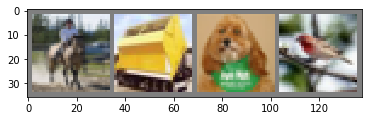

horsetruck  dog bird


In [40]:
# Revisemos las imagenes de entrenamiento:

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img=img/2+0.5 #Desnormalizar
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#obtener imágen aleatoria:
dataiter=iter(trainloader) #Qué es iter??
images, labels= dataiter.next() # y qué es la función.next()?

#mostrar img

imshow(torchvision.utils.make_grid(images))

#mostrar etiquetas

print(''.join('%5s' % classes[labels[j]] for j in range(4))) # todo esto aquí es raro: qué hace %5?, %, join???

In [41]:
# Definimos una red convolucional parecida al ejemplo, pero con la diferencia de que ahora
# recibe imágenes de 3 canales en veez de 1:

import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__() #No me queda claro cómo se definen las entradas de la red
        #3 canales de input, 6 de output y convulición de 5x5
        

        self.conv1 =nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2, 2)#
        self.conv2 = nn.Conv2d(4, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        
        #----- esta definición genera el error siguiente:
        #RuntimeError: Given groups=1, weight of size 6 3 5 5, expected input[4, 1, 28, 28] 
        #to have 3 channels, but got 1 channels instead
        
        #con esto:
        #torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, 
        #padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
        
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = ConvNet()



In [42]:
# Definimos una función de costos:

import torch.optim as optim

criterion=nn.MSELoss()
#optimizer= optim.SGD(net.parameters(), lr=0.01)

#criterion=nn.CrossEntropyLoss()
#optimizer=optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# Entrenamos la red:

for epoc in range(2):
    # 2 loops?
    running_loss=0.0
    for i, data in enumerate(trainloader, 0):
        #los datos son una lista de [inputs, labels]
        inputs, labes=data
        
        #recordar anular gradientes acumulados:
        optimizer.zero_grad()
        
        outputs=net(inputs) #forward
        loss=criterion(outputs, labels) #costos
        loss.backward() #backprop (gradientes) y
        optimizer.step()  #optimización
        
        #mostrar estadísticas:
        running_loss+=loss.item() #no pensé que iba a usar esta función jaja
        if i % 2000== 1999: #mostrar minibatches
            print('[d%, %5d] loss: %.3f' % (epoch +1, i+1, running_loss/2000))
            running_loss=0.0
print('Entrenamiento finalizado')
    
    
    # Al aplicar esta celda ocurre un error con la evaluación forward de los inputs
    # en que al parecer no calzan con la entrada de la red.
    # Probé copiando directamente el código de la página y, si bien ya no da el error de los inputs,
    # el kernel muere y se reinicia, busqué bastante en los foros y no hay explicación más que
    # falta de compatibilidad entre pytorch y

In [43]:
# Guardar modelo
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

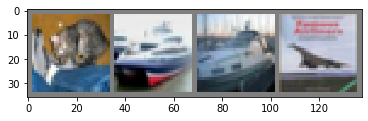

GroundTruth:    cat  ship  ship plane


In [44]:
# Probamos la red con datos de test:

dataiter = iter(testloader)
images, labels = dataiter.next()

# mostrar imagenes
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))



In [46]:
# Para volver a cargar el modelo:
net = Net()
net.load_state_dict(torch.load(PATH))


In [48]:
#outputs = net(images)

In [ ]:
# Hay un problema de compatibilidad con mi procesador (AMD)
# que hace que el kernel se muera durante el entrenamiento
# Revisaré los tutoriales de Pyro a ver si tengo el mismo problema
# en tal caso me vuelvo a Tensorflow y Keras